## Individual Variable Data Exploration Notebook

In [ ]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_train = pd.read_csv('claim_data_v2_train.csv')
data_train.sample(3)

,State_Code,State,Claim_Amount,Education,Claim_Date,Employment_Status,Gender,Income,Location,Marital_Status,...,Months_Since_Last_Claim,Months_Since_Policy_Inception,Claim_Cause,Claim_Report_Type,Vehicle_Class,Vehicle_Size,Vehicle_Model,Outstanding_Balance,Fraudulent_Claim,Claimant__Number
3170,IA,Iowa,443.680621,Bachelor,12/15/2018,Employed,F,77609,Rural,Married,...,26,75,Hail,Branch,Sports Car,Midsize,Honda,2608.0,N,4171
4062,NE,Nebraska,2843.564035,College,01/15/2019,Unemployed,F,0,Suburban,Single,...,29,22,Hail,Branch,SUV,Midsize,Toyota,25772.0,N,5063
1602,IA,Iowa,272.639297,High School or Below,12/01/2018,Employed,F,48039,Rural,Married,...,4,37,Other,Branch,Four-Door Car,Midsize,Chevrolet,3805.0,N,2603


In [5]:
def visualize_cat(attr, df=data_train):
    df_i = df[['Fraudulent_Claim', attr]].groupby([attr])['Fraudulent_Claim'].agg(['count','sum', 'mean'])
    m = 'Pct Fraud'
    df_i = df_i.rename({'count': 'frequency', 'sum': 'Survivers', 'mean': m}, axis='columns')
    print(df_i)
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    df_i['frequency'].plot.bar(ax=ax1, alpha=.8)
    df_i[m].plot.line(ax=ax2, color='k')
    ax1.set_ylabel('frequency')
    ax2.set_ylabel('Pct Fraud')
    ax2.set_ylim(bottom=0, top=1, auto=False)
    ax2.legend()

In [6]:
data_train["Fraudulent_Claim"].describe()

count     5001
unique       2
top          N
freq      4694
Name: Fraudulent_Claim, dtype: object

In [7]:
#Convert Fraud Claim data from Y/N to 1/0
data_train.Fraudulent_Claim.replace(('Y', 'N'), (1, 0), inplace=True)

In [10]:
#Test to see if fraud claim data converted correctly 
data_train.head()

,State_Code,State,Claim_Amount,Education,Claim_Date,Employment_Status,Gender,Income,Location,Marital_Status,...,Months_Since_Last_Claim,Months_Since_Policy_Inception,Claim_Cause,Claim_Report_Type,Vehicle_Class,Vehicle_Size,Vehicle_Model,Outstanding_Balance,Fraudulent_Claim,Claimant__Number
0,KS,Kansas,575.560000,Bachelor,12/01/2018,Employed,F,56274,Suburban,Married,...,32,5,Collision,Agent,Two-Door Car,Midsize,Toyota,25781.0,0,1001
1,NE,Nebraska,697.953590,Bachelor,12/01/2018,Unemployed,F,0,NaN,Single,...,13,42,Scratch/Dent,Agent,Four-Door Car,Midsize,Chevrolet,37061.0,0,1002
2,OK,Oklahoma,1288.743165,Bachelor,12/01/2018,Employed,F,48767,Suburban,Married,...,18,38,Collision,Agent,Two-Door Car,Midsize,Chevrolet,17236.0,0,1003
3,MO,Missouri,764.586183,Bachelor,12/01/2018,Unemployed,M,0,Suburban,Married,...,18,65,Collision,Call Center,SUV,Midsize,Honda,30270.0,0,1004
4,KS,Kansas,281.369258,Bachelor,12/01/2018,Employed,M,43836,Rural,Single,...,52,44,Collision,Agent,Four-Door Car,Midsize,Ford,16263.0,0,1005


In [9]:
data_train.columns

Index(['State_Code', 'State', 'Claim_Amount', 'Education', 'Claim_Date',
       'Employment_Status', 'Gender', 'Income', 'Location', 'Marital_Status',
       'Monthly_Premium', 'Annual_Premium', 'Months_Since_Last_Claim',
       'Months_Since_Policy_Inception', 'Claim_Cause', 'Claim_Report_Type',
       'Vehicle_Class', 'Vehicle_Size', 'Vehicle_Model', 'Outstanding_Balance',
       'Fraudulent_Claim', 'Claimant__Number'],
      dtype='object')

In [36]:
data_train.describe(include='all')

,State_Code,State,Claim_Amount,Education,Claim_Date,Employment_Status,Gender,Income,Location,Marital_Status,...,Months_Since_Last_Claim,Months_Since_Policy_Inception,Claim_Cause,Claim_Report_Type,Vehicle_Class,Vehicle_Size,Vehicle_Model,Outstanding_Balance,Fraudulent_Claim,Claimant__Number
count,5001,5001,5001.000000,4990,5001,5001,5001,5.001000e+03,4998,5001,...,5001.000000,5001.000000,5001,5001,5001,5001,5001,4992.000000,5001,5001.000000
unique,5,5,NaN,5,3,5,2,NaN,3,3,...,NaN,NaN,5,4,6,3,4,NaN,2,NaN
top,IA,Iowa,NaN,College,12/15/2018,Employed,M,NaN,Suburban,Married,...,NaN,NaN,Collision,Agent,Four-Door Car,Midsize,Toyota,NaN,N,NaN
freq,1546,1546,NaN,1492,2000,3126,2531,NaN,3156,2930,...,NaN,NaN,2077,1889,2535,3523,1278,NaN,4694,NaN
mean,NaN,NaN,787.763253,NaN,NaN,NaN,NaN,4.131045e+04,NaN,NaN,...,15.004199,48.234953,NaN,NaN,NaN,NaN,NaN,23728.152644,NaN,3501.000000
std,NaN,NaN,655.963269,NaN,NaN,NaN,NaN,2.276904e+05,NaN,NaN,...,11.139649,28.096651,NaN,NaN,NaN,NaN,NaN,13827.401917,NaN,1443.808678
min,NaN,NaN,189.868369,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,1001.000000
25%,NaN,NaN,402.296353,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,...,5.000000,24.000000,NaN,NaN,NaN,NaN,NaN,11528.750000,NaN,2251.000000
50%,NaN,NaN,577.390039,NaN,NaN,NaN,NaN,3.464000e+04,NaN,NaN,...,13.000000,48.000000,NaN,NaN,NaN,NaN,NaN,23993.500000,NaN,3501.000000
75%,NaN,NaN,886.114954,NaN,NaN,NaN,NaN,6.300900e+04,NaN,NaN,...,23.000000,72.000000,NaN,NaN,NaN,NaN,NaN,35574.000000,NaN,4751.000000


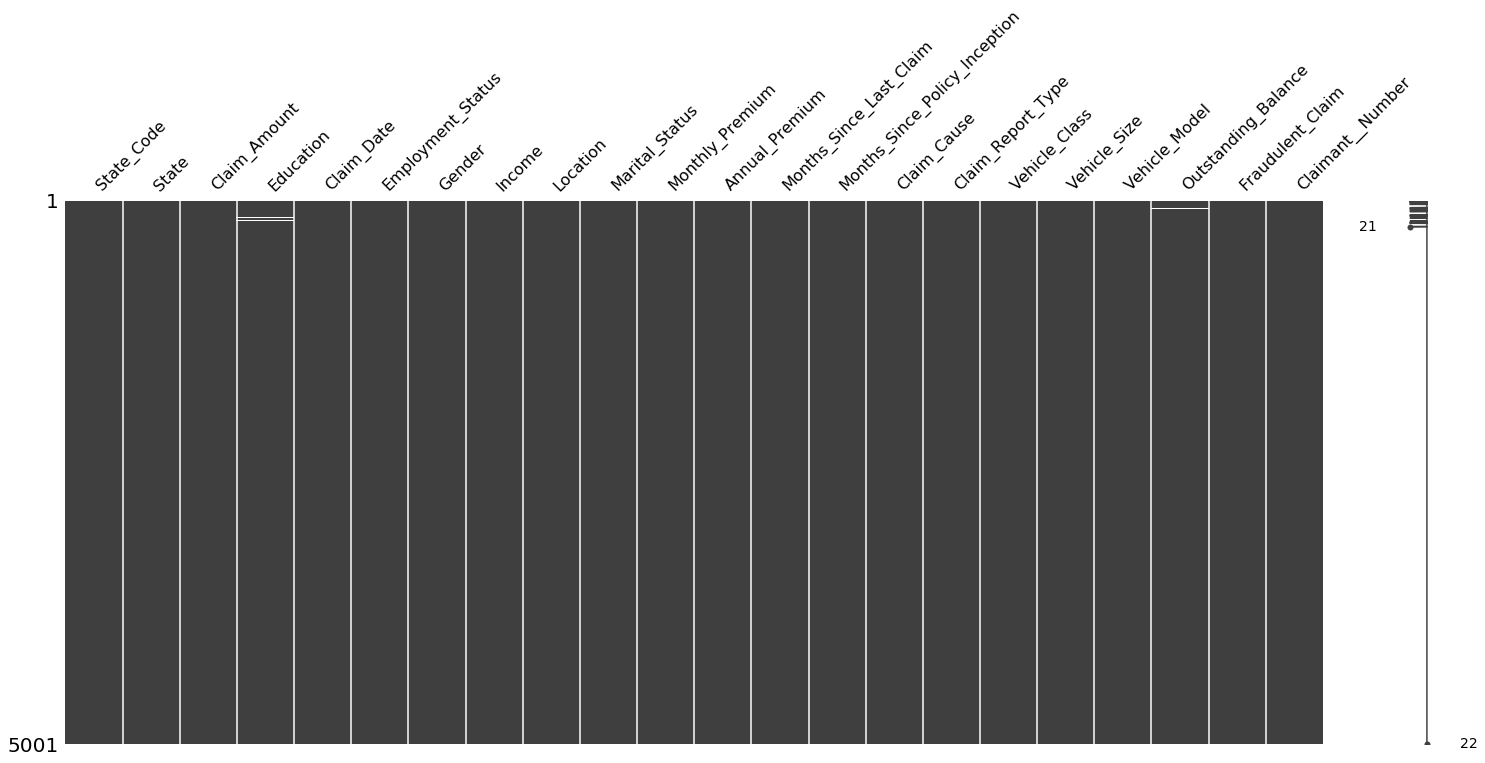

In [13]:
# missing data
msno.matrix(data_train)

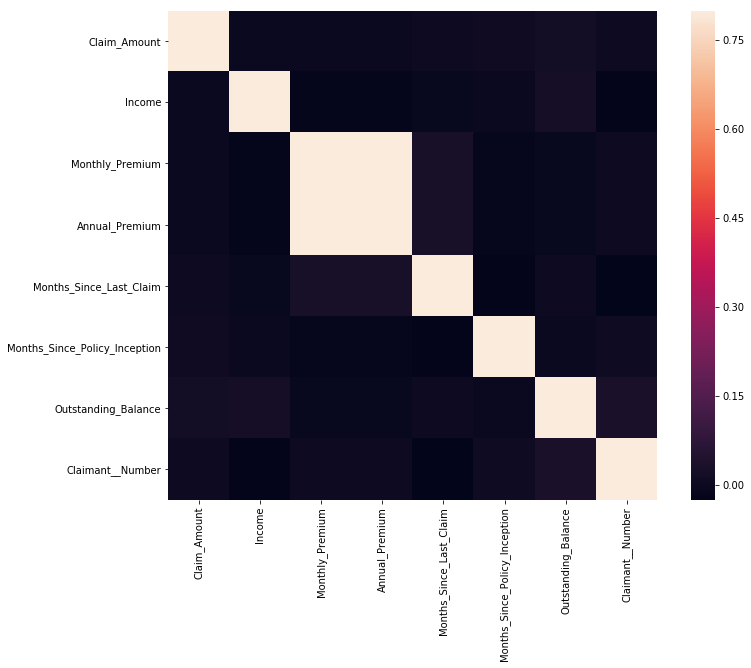

In [38]:
corrmat= data_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# Describe Each Variable - Find Outliers

#### Claim Amount

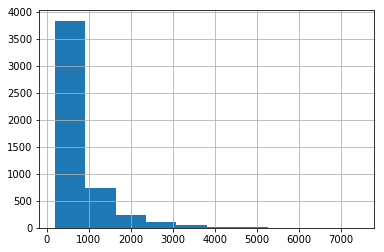

In [40]:
data_train['Claim_Amount'].hist()

Log tranformation

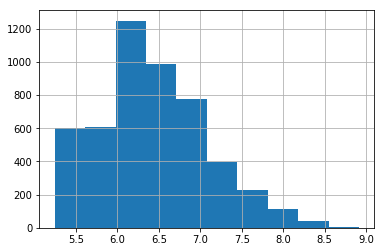

In [16]:
data_train['Claim_Amount'].apply(np.log).hist()

#### Income

Income has a major outlier of $10M

In [23]:
data_train['Income'].describe()

count    5.001000e+03
mean     4.131045e+04
std      2.276904e+05
min      0.000000e+00
25%      0.000000e+00
50%      3.464000e+04
75%      6.300900e+04
max      1.596780e+07
Name: Income, dtype: float64

Top 10 Earners

In [37]:
data_train['Income'].sort_values(ascending=False).head(10)

553     15967801
484       933288
574       250000
1750       99981
2306       99961
532        99960
932        99934
4811       99875
1159       99845
1729       99845
Name: Income, dtype: int64

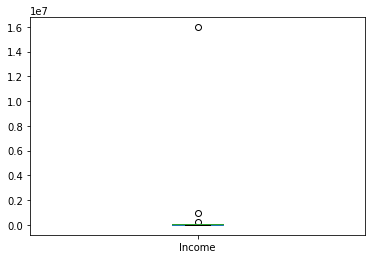

In [21]:
data_train['Income'].plot.box()

Drop values above the boxplot (greater than Q3+1.5*IQR)

Cutoff value: 126018.0


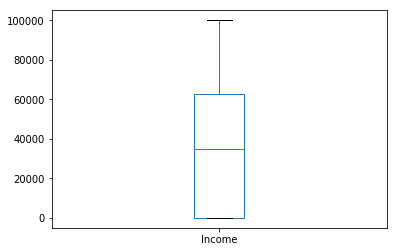

In [41]:
cutoff = data_train['Income'].quantile(.75) + (data_train['Income'].quantile(.75) - data_train['Income'].quantile(.25))
print("Cutoff value:", cutoff)

data_train['Income'][data_train['Income']<cutoff].plot.box()

Graph histogram without 0 income and without outliers

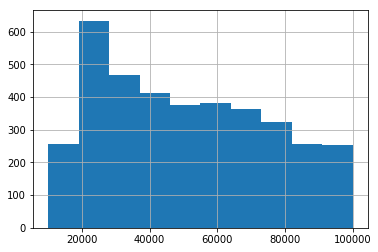

In [43]:
data_train['Income'][(data_train['Income']<cutoff) & (data_train['Income']>0)].hist()

#### Premium

Validate that Annual Premium is 12 times Monthly Premium

In [44]:
data_train[data_train['Monthly_Premium'] * 12 != data_train['Annual_Premium']]

,State_Code,State,Claim_Amount,Education,Claim_Date,Employment_Status,Gender,Income,Location,Marital_Status,...,Months_Since_Last_Claim,Months_Since_Policy_Inception,Claim_Cause,Claim_Report_Type,Vehicle_Class,Vehicle_Size,Vehicle_Model,Outstanding_Balance,Fraudulent_Claim,Claimant__Number


In [46]:
data_train['Monthly_Premium'].describe()

count    5001.000000
mean       94.530694
std        26.120856
min        50.000000
25%        72.000000
50%        95.000000
75%       116.000000
max       140.000000
Name: Monthly_Premium, dtype: float64

Premium is approximately uniformly distributed between 50 and 140

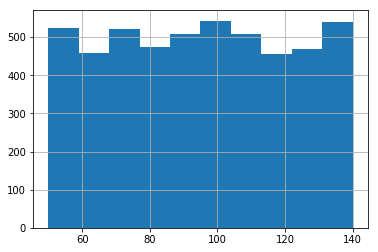

In [44]:
data_train['Monthly_Premium'].hist()

In [47]:
data_train['Months_Since_Last_Claim'].describe()

count    5001.000000
mean       15.004199
std        11.139649
min         0.000000
25%         5.000000
50%        13.000000
75%        23.000000
max        60.000000
Name: Months_Since_Last_Claim, dtype: float64

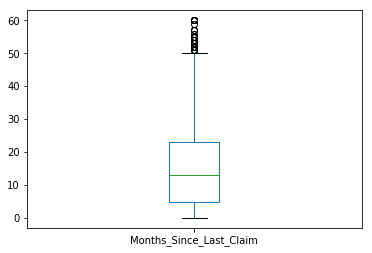

In [50]:
data_train['Months_Since_Last_Claim'].plot.box()

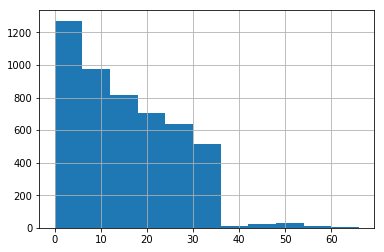

In [54]:
data_train['Months_Since_Last_Claim'].hist(bins=range(0, 72, 6))

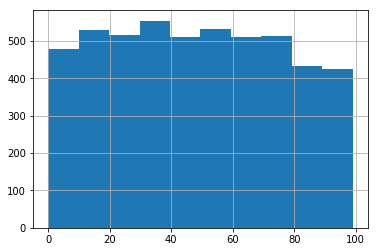

In [46]:
data_train['Months_Since_Policy_Inception'].hist()

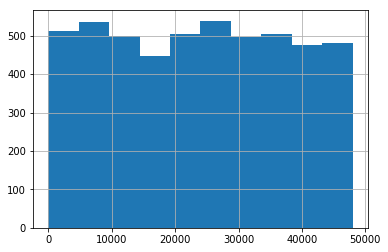

In [4]:
data_train['Outstanding_Balance'].hist()

In [42]:
def get_categorical_dist(attr):
    return data_train.groupby(attr).size().sort_values(ascending=False)

In [43]:
get_categorical_dist('State_Code')

State_Code
IA    1546
MO    1446
NE    1022
OK     522
KS     465
dtype: int64

In [44]:
get_categorical_dist('Education')

Education
College                 1492
Bachelor                1491
High School or Below    1405
Master                   395
Doctor                   207
dtype: int64

In [45]:
get_categorical_dist('Employment_Status')

Employment_Status
Employed         3126
Unemployed       1270
Medical Leave     234
Disabled          213
Retired           158
dtype: int64

In [46]:
get_categorical_dist('Gender')

Gender
M    2531
F    2470
dtype: int64

In [53]:
get_categorical_dist('Marital_Status')

Marital_Status
Married     2930
Single      1321
Divorced     750
dtype: int64

In [47]:
get_categorical_dist('Location')

Location
Suburban    3156
Rural        981
Urban        861
dtype: int64

In [48]:
get_categorical_dist('Claim_Cause')

Claim_Cause
Collision       2077
Hail            1578
Scratch/Dent     765
Other            580
Fire               1
dtype: int64

In [49]:
get_categorical_dist('Claim_Report_Type')

Claim_Report_Type
Agent          1889
Branch         1411
Call Center     958
Web             743
dtype: int64

In [50]:
get_categorical_dist('Vehicle_Class')

Vehicle_Class
Four-Door Car    2535
Two-Door Car     1029
SUV               988
Sports Car        256
Luxury SUV        115
Luxury Car         78
dtype: int64

In [51]:
get_categorical_dist('Vehicle_Model')

Vehicle_Model
Toyota       1278
Chevrolet    1267
Ford         1265
Honda        1191
dtype: int64

In [52]:
get_categorical_dist('Fraudulent_Claim')

Fraudulent_Claim
N    4694
Y     307
dtype: int64

In [54]:
get_categorical_dist('Claim_Date')

Claim_Date
12/15/2018    2000
12/01/2018    2000
01/15/2019    1001
dtype: int64

In [48]:
#missing data
data_train.isna().sum()

State_Code                        0
State                             0
Claim_Amount                      0
Education                        11
Claim_Date                        0
Employment_Status                 0
Gender                            0
Income                            0
Location                          3
Marital_Status                    0
Monthly_Premium                   0
Annual_Premium                    0
Months_Since_Last_Claim           0
Months_Since_Policy_Inception     0
Claim_Cause                       0
Claim_Report_Type                 0
Vehicle_Class                     0
Vehicle_Size                      0
Vehicle_Model                     0
Outstanding_Balance               9
Fraudulent_Claim                  0
Claimant__Number                  0
dtype: int64

c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


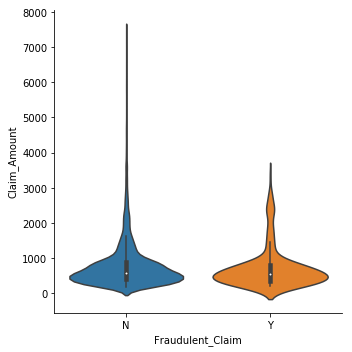

In [49]:
sns.catplot(x="Fraudulent_Claim", y="Claim_Amount", kind="violin",data=data_train);

c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


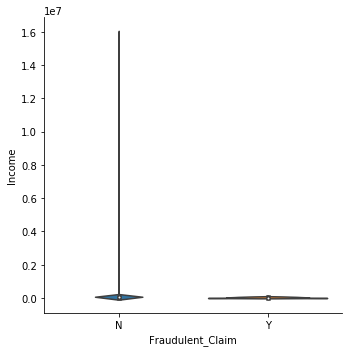

In [50]:
sns.catplot(x="Fraudulent_Claim", y="Income", kind="violin",data=data_train);